In [103]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [104]:
admision = pd.read_csv("Admission_Predict_Ver1.1.csv")

In [105]:
admision = admision.drop("Serial No.", axis=1)

In [106]:
admision

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [107]:
X = admision.iloc[:,0:7]
y = admision.iloc[:,-1]

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [110]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(7, activation='relu',
                          input_shape=(X_train.shape[1],)), # Input layer

    tf.keras.layers.Dense(7, activation='relu'), # Hidden layer

    tf.keras.layers.Dense(1, activation="linear")  # Output layer for regression
])

In [111]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Training the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_split=0.2)

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/100
10/10 [==============================] - 1s 18ms/step - loss: 0.3778 - mae: 0.6044 - val_loss: 0.3220 - val_mae: 0.5582
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2575 - mae: 0.4987 - val_loss: 0.2082 - val_mae: 0.4469
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1657 - mae: 0.3969 - val_loss: 0.1238 - val_mae: 0.3384
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0997 - mae: 0.2995 - val_loss: 0.0670 - val_mae: 0.2352
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0567 - mae: 0.2092 - val_loss: 0.0357 - val_mae: 0.1488
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0347 - mae: 0.1468 - val_loss: 0.0264 - val_mae: 0.1300
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0280 - mae: 0.1371 - val_loss: 0.0244 - val_mae: 0.1308
Epoch 8/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0243 - 

In [112]:
print('Mean Squared Error: ', loss[0])

Mean Squared Error:  0.004121942445635796


In [113]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 7)                 56        
                                                                 
 dense_13 (Dense)            (None, 7)                 56        
                                                                 
 dense_14 (Dense)            (None, 1)                 8         
                                                                 
Total params: 120 (480.00 Byte)
Trainable params: 120 (480.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


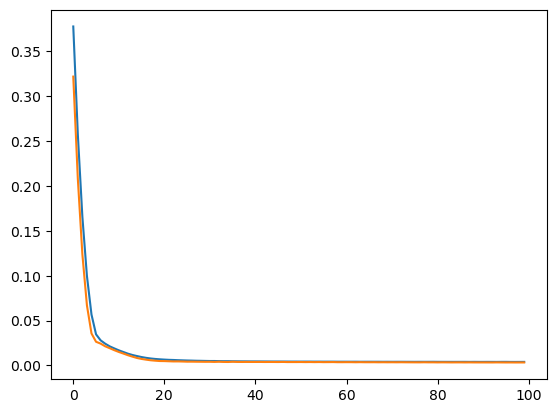

In [114]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()